<a href="https://colab.research.google.com/github/SoumyAlok/ANN-model-for-churn-analysis/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [36]:
# Importing dataset
data = pd.read_csv("/content/Churn_Modelling.csv")
x = data.iloc[: , 3:13]
y = data.iloc[: , 13]

In [37]:
# Creating dummy variables
geography = pd.get_dummies(x["Geography"], drop_first = True)
gender = pd.get_dummies(x["Gender"], drop_first = True)

In [38]:
# Concatenate the data frames
x = pd.concat([x, geography, gender], axis = 1)

In [42]:
# Drop unnecesssary columns
x = x.drop(["Geography", "Gender"], axis = 1)

In [43]:
#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [47]:
classifier = Sequential()

In [74]:
classifier.add(Dense(units = 5, kernel_initializer = "he_uniform", activation = "relu", input_dim = 11))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
classifier.add(Dense(units = 10, kernel_initializer = "he_uniform", activation = "relu"))

In [76]:
classifier.add(Dense(units = 5, kernel_initializer = "he_uniform", activation = "relu"))

In [77]:
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

In [78]:
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [79]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.2, batch_size = 20, epochs = 20)

Epoch 1/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7560 - loss: 0.6353 - val_accuracy: 0.8650 - val_loss: 0.5060
Epoch 2/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8657 - loss: 0.4611 - val_accuracy: 0.8537 - val_loss: 0.4009
Epoch 3/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3807 - val_accuracy: 0.8594 - val_loss: 0.3660
Epoch 4/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8661 - loss: 0.3531 - val_accuracy: 0.8562 - val_loss: 0.3556
Epoch 5/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.3533 - val_accuracy: 0.8569 - val_loss: 0.3509
Epoch 6/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3427 - val_accuracy: 0.8619 - val_loss: 0.3494
Epoch 7/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8607 - loss: 0.3476 - val_accuracy: 0.8562 - val_loss: 0.3605
Epoch 8/20
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3374 - val_accuracy: 0.

In [80]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


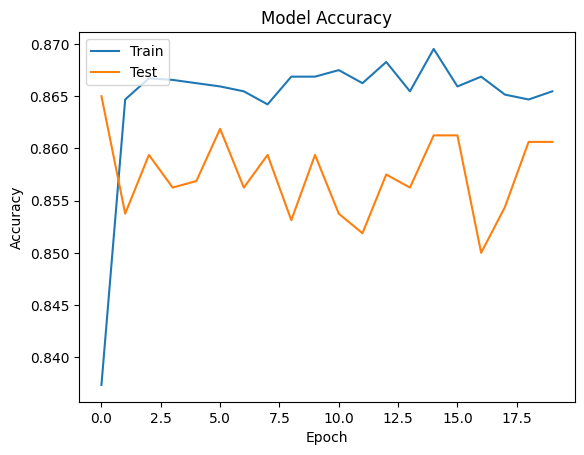

In [81]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

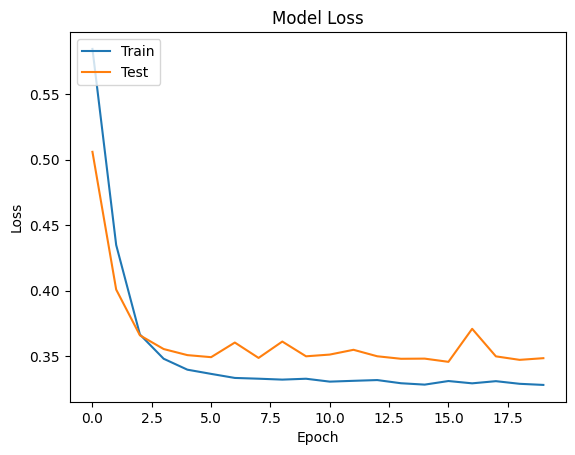

In [82]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [83]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [85]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [86]:
print(score)
print(cm)

0.8525
[[1498   97]
 [ 198  207]]
